## Z scores

Let's sample randomly one sale price from the SalePrice column and see what can we say about the sampled value:

In [1]:
import pandas as pd

houses = pd.read_table('data/AmesHousing_1.txt')

In [2]:
houses['SalePrice'].sample(1, random_state = 0)

2216    220000
Name: SalePrice, dtype: int64

We can see we got a price of $220,000. Is a house costing $220,000 cheap, expensive, or average-priced? To answer this question, we can start with finding the mean price of a house and then figure out whether $220,000 is below or above the mean:

In [3]:
houses['SalePrice'].mean()

180796.0600682594

The sampled house ($220,000) is clearly more expensive than the average house (roughly $180,796), but is this price slightly above the average or extremely above the average? The answer depends on the standard deviation of the distribution of sale prices.

To see why this is true, consider below two normally-distributed samples of sale prices (we made this simplifying assumption of normality for teaching purposes). Both samples have the same mean ¯x=180,000, but the sample standard deviations s are different (on the left, s=40,000, while on the right s=10,000). 

![Standard deviations](img/s2m5_different_sds.svg)

For the sample with a greater standard deviation (s=40000), we can see that $220,000 is fairly close to the mean, indicating that houses at that price are common and thus not very expensive (relative to the other houses on the market).

For the other sample (s=10000), we see $220,000 on the far right of the distribution, indicating that houses at that price are uncommon and thus very expensive (relative to the other houses on the market).

Now let's try to figure out how far off from the mean a value of $220,000 is in the distribution of the SalePrice variable.

## Task 

+ Generate a kernel density plot for the SalePrice variable to find out how far off $220,000 is from the mean.
    + Generate the plot using `Series.plot.kde()`.
        + The limits of the x-axis should be the minimum and the maximum value of the SalePrice variable. To set the limits you can use the xlim parameter of `Series.plot.kde()`.
    + Plot a vertical line to indicate visually the location of the mean using `plt.axvline()`.
        + The color of the line should be black, and its label should be 'Mean'. You can use the color and label parameters of `plt.axvline()`.
    + Plot a vertical line to indicate visually the standard deviation distance above the mean — you'll have to generate a vertical line for the sum of the mean and standard deviation.
        + Assume that the data is a population and compute the standard deviation without using Bessel's correction.
        + The color of the line should be red and its label should be 'Standard deviation'.
    + Plot a vertical line for the $220,000 price.
        + The color of the line should be orange and its label should be '220000'.
    + Display all the labels using `plt.legend()`.

+ Examine the graph and figure out whether a price of $220,000 is very expensive. If it's very expensive, assign True to variable named very_expensive, otherwise assign False.


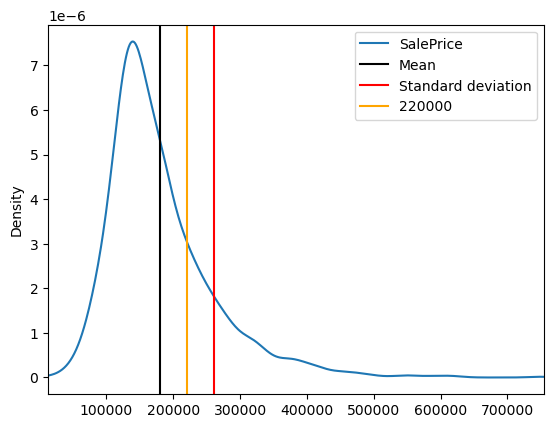

In [4]:
import matplotlib.pyplot as plt
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                    houses['SalePrice'].max()))

st_dev = houses['SalePrice'].std(ddof = 0)
mean = houses['SalePrice'].mean()
plt.axvline(mean, color = 'Black', label = 'Mean')
plt.axvline(mean + st_dev, color = 'Red', label = 'Standard deviation')
plt.axvline(220000, color = 'Orange', label = '220000')
plt.legend()

very_expensive = False

### Number of Standard Deviations